# Identitas Kelompok
Nomor Kelompok: 5

Nama Kelompok: Lima-B-Aja

Ketua Kelompok: Fajar Arahman

Anggota kelompok:
1. MUHAMAD FAHMI AMIQ
2. FAJAR ARAHMAN
3. AMMAR KHAQ BAASIR
4. LIANUS
5. INDAH LESTARI
6. NADILA
7. FATIHAH
8. Meilia Choirun Nisa 

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
import seaborn as sb

In [2]:
df = pd.read_csv('flight.csv')

In [3]:
df.sample(5)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
51072,31624,11/2/2011,11/2/2011,Female,4,zhuhai,guangdongsheng,CN,26.0,3/31/2014,...,1300.0,4256,11/25/2013,128,275.0000,541,0,0.609154,1697,0
17485,50694,12/5/2011,12/5/2011,Male,4,shenzhen,guangdong,CN,29.0,3/31/2014,...,6204.0,22605,3/1/2014,31,69.7000,168,0,0.617273,9117,0
19660,53860,7/30/2006,7/30/2006,Female,4,haerbin,heilongjiang,CN,49.0,3/31/2014,...,0.0,16606,5/7/2013,330,41.7500,113,0,0.748847,10496,0
43139,31598,12/7/2010,12/7/2010,Male,4,xianggang,NaN,CN,78.0,3/31/2014,...,1150.0,8536,3/18/2014,14,219.0000,647,0,0.465000,3192,0
9376,3801,11/15/2008,4/2/2009,Male,4,shanghai,shanghai,CN,35.0,3/31/2014,...,5439.0,25352,12/18/2013,105,38.4375,99,0,0.905706,21253,0


### 1. Lakukan EDA pada dataset untuk mendapatkan pemahaman umum mengenai data dan memandu proses feature engineering

<b> a. Pastikan setiap kolom dataset memiliki tipe data yang tepat, tidak ada data kosong, 
bebas dari duplikat, dan berada di range value yang tepat

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

setiap kolom dataset memiliki tipe data yang tepat.

In [5]:
for i in df.columns:
    if df[i].isnull().sum() > 0:
        print(i)
        print('Jumlah data yang null:', df[i].isnull().sum())
        print('Tipe Data yaitu', df[i].dtypes)
        print()

GENDER
Jumlah data yang null: 3
Tipe Data yaitu object

WORK_CITY
Jumlah data yang null: 2269
Tipe Data yaitu object

WORK_PROVINCE
Jumlah data yang null: 3248
Tipe Data yaitu object

WORK_COUNTRY
Jumlah data yang null: 26
Tipe Data yaitu object

AGE
Jumlah data yang null: 420
Tipe Data yaitu float64

SUM_YR_1
Jumlah data yang null: 551
Tipe Data yaitu float64

SUM_YR_2
Jumlah data yang null: 138
Tipe Data yaitu float64



Terdapat data kosong, dengan rincian dapat dilihat di atas.

In [6]:
df.duplicated().sum()

0

Bebas dari duplikat

In [7]:
df.describe()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.000000,62988.000000,62568.000000,62988.000000,62988.000000,62437.000000,62850.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,31494.500000,4.102162,42.476346,11.839414,10925.081254,5355.376064,5604.026014,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,18183.213715,0.373856,9.885915,14.049471,16339.486151,8109.450147,8703.364247,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,1.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,15747.750000,4.000000,35.000000,3.000000,2518.000000,1003.000000,780.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,31494.500000,4.000000,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,47241.250000,4.000000,48.000000,15.000000,12831.000000,6574.000000,6845.750000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


Data berada di range value yang tepat. misal MEMBER_NO sudah tepat berada di range value 1 sampai 62988. Begitupun untuk data yang lain sudah tepat.

<b> b. Keluarkan statistik kolom baik numerik maupun kategorikal, cari bentuk distribusi setiap kolom (numerik), dan jumlah baris untuk setiap unique value (kategorikal)

In [8]:
cats =['FFP_DATE',
       'FIRST_FLIGHT_DATE',
       'GENDER',
       'WORK_CITY',
       'WORK_PROVINCE',
      'WORK_COUNTRY',
      'LOAD_TIME',
      'LAST_FLIGHT_DATE']

nums = ['MEMBER_NO', 
              'FFP_TIER', 
              'AGE', 
              'FLIGHT_COUNT', 
              'BP_SUM', 
              'SUM_YR_1', 
              'SUM_YR_2', 
              'SEG_KM_SUM', 
              'LAST_TO_END', 
              'AVG_INTERVAL',
              'MAX_INTERVAL', 
              'EXCHANGE_COUNT', 
              'avg_discount', 
              'Points_Sum', 
              'Point_NotFlight']

<b> jumlah baris untuk setiap unique value (kategorikal)

In [9]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print('\n')

Value count kolom FFP_DATE:
1/13/2011     184
1/1/2013      165
3/1/2013      100
11/17/2010     99
1/14/2011      95
             ... 
10/4/2005       1
5/18/2009       1
11/29/2004      1
11/7/2004       1
5/19/2009       1
Name: FFP_DATE, Length: 3068, dtype: int64


Value count kolom FIRST_FLIGHT_DATE:
2/16/2013    96
9/30/2012    85
2/15/2013    84
9/9/2005     78
4/21/2012    70
             ..
3/2/2005      1
4/12/2009     1
2/20/2005     1
1/27/2005     1
12/7/2004     1
Name: FIRST_FLIGHT_DATE, Length: 3406, dtype: int64


Value count kolom GENDER:
Male      48134
Female    14851
Name: GENDER, dtype: int64


Value count kolom WORK_CITY:
guangzhou    9386
beijing      7845
shanghai     5001
shenzhen     3605
dalian       1979
             ... 
KASUGAI         1
hainan          1
xinxishi        1
KA              1
lingshui        1
Name: WORK_CITY, Length: 3234, dtype: int64


Value count kolom WORK_PROVINCE:
guangdong        17509
beijing           8014
shanghai          4998


<b> Bentuk distribusi setiap kolom (numerik)

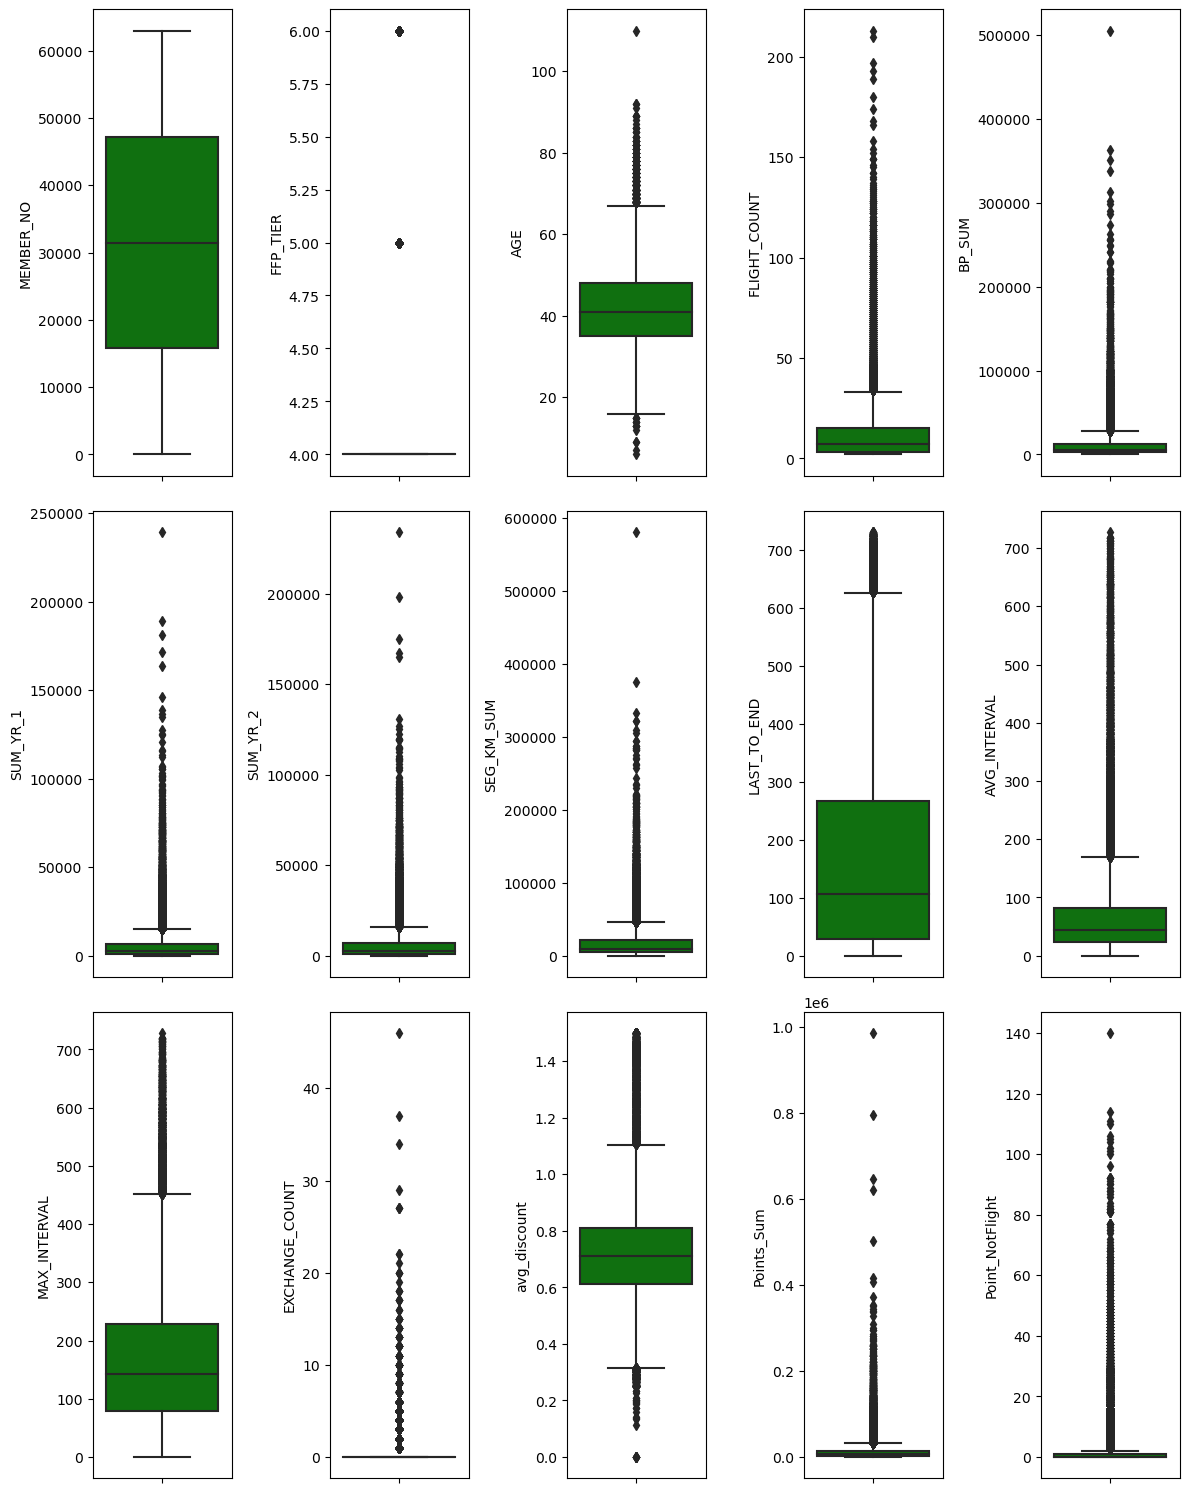

In [10]:
plt.figure(figsize=(12, 20))
for i in range(0, len(nums)):
    plt.subplot(4, int(len(nums)/3), i+1)
    sns.boxplot(y=df[nums[i]], color='green', orient='v')
    plt.tight_layout()

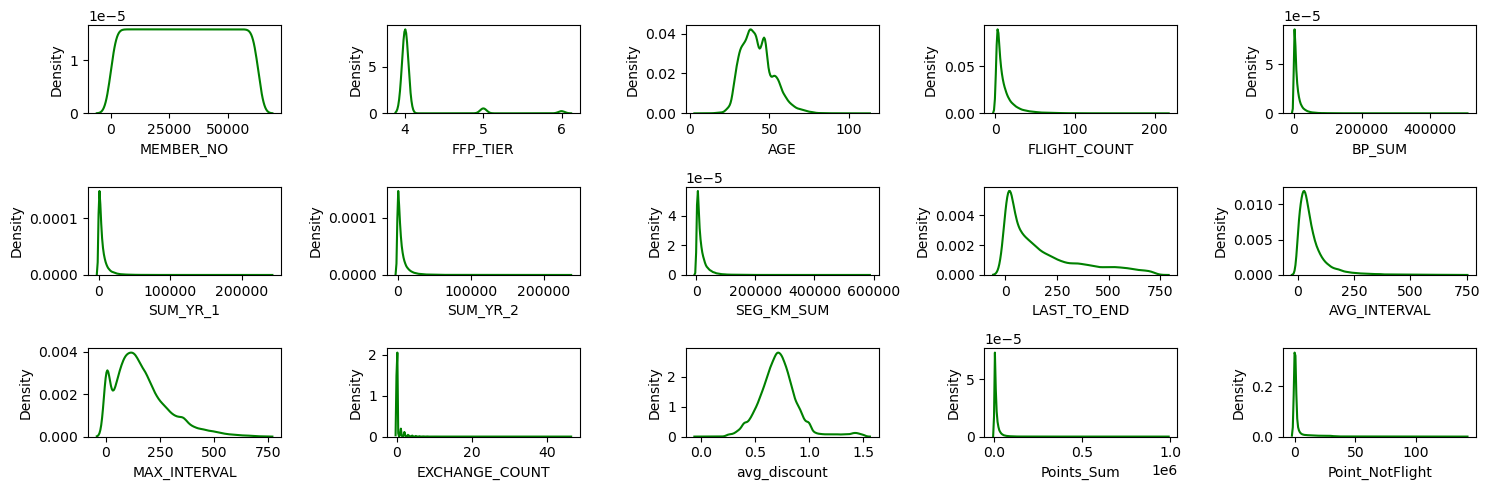

In [11]:
plt.figure(figsize=(15, 5))
for i in range(0, len(nums)):
    plt.subplot(3, 5, i+1)
    sns.kdeplot(x=df[nums[i]], color='green')
    plt.xlabel(nums[i])
    plt.tight_layout()

<b> C. Cari tahu apakah ada kolom-kolom yang berkorelasi kuat satu sama lain

In [12]:
df[nums].corr()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
MEMBER_NO,1.000000,-0.005910,0.001259,-0.000276,0.000063,-0.002529,0.001185,-0.000032,-0.002588,0.002479,0.004761,-0.003844,0.001727,-0.003613,-0.033204
FFP_TIER,-0.005910,1.000000,0.078654,0.582447,0.581085,0.463122,0.611385,0.522350,-0.206313,-0.144928,-0.127641,0.342355,0.248845,0.559249,0.192803
AGE,0.001259,0.078654,1.000000,0.073246,0.100501,0.111815,0.083743,0.087254,-0.025600,-0.024613,0.009382,0.029604,0.133235,0.074757,-0.092282
FLIGHT_COUNT,-0.000276,0.582447,0.073246,1.000000,0.788379,0.748032,0.794838,0.850411,-0.404999,-0.316833,-0.188682,0.502501,0.139377,0.747092,0.291880
BP_SUM,0.000063,0.581085,0.100501,0.788379,1.000000,0.850624,0.884632,0.921724,-0.319039,-0.246764,-0.147953,0.530021,0.307245,0.923271,0.244254
SUM_YR_1,-0.002529,0.463122,0.111815,0.748032,0.850624,1.000000,0.663009,0.804125,-0.186173,-0.243309,-0.145206,0.488029,0.268884,0.788354,0.235095
SUM_YR_2,0.001185,0.611385,0.083743,0.794838,0.884632,0.663009,1.000000,0.849195,-0.423420,-0.246290,-0.154905,0.468149,0.234652,0.826666,0.237954
SEG_KM_SUM,-0.000032,0.522350,0.087254,0.850411,0.921724,0.804125,0.849195,1.000000,-0.369509,-0.280746,-0.155508,0.507819,0.108393,0.853014,0.259037
LAST_TO_END,-0.002588,-0.206313,-0.025600,-0.404999,-0.319039,-0.186173,-0.423420,-0.369509,1.000000,-0.108594,-0.343939,-0.169717,-0.021036,-0.292027,-0.124074
AVG_INTERVAL,0.002479,-0.144928,-0.024613,-0.316833,-0.246764,-0.243309,-0.246290,-0.280746,-0.108594,1.000000,0.724392,-0.130226,-0.038814,-0.220946,-0.075967


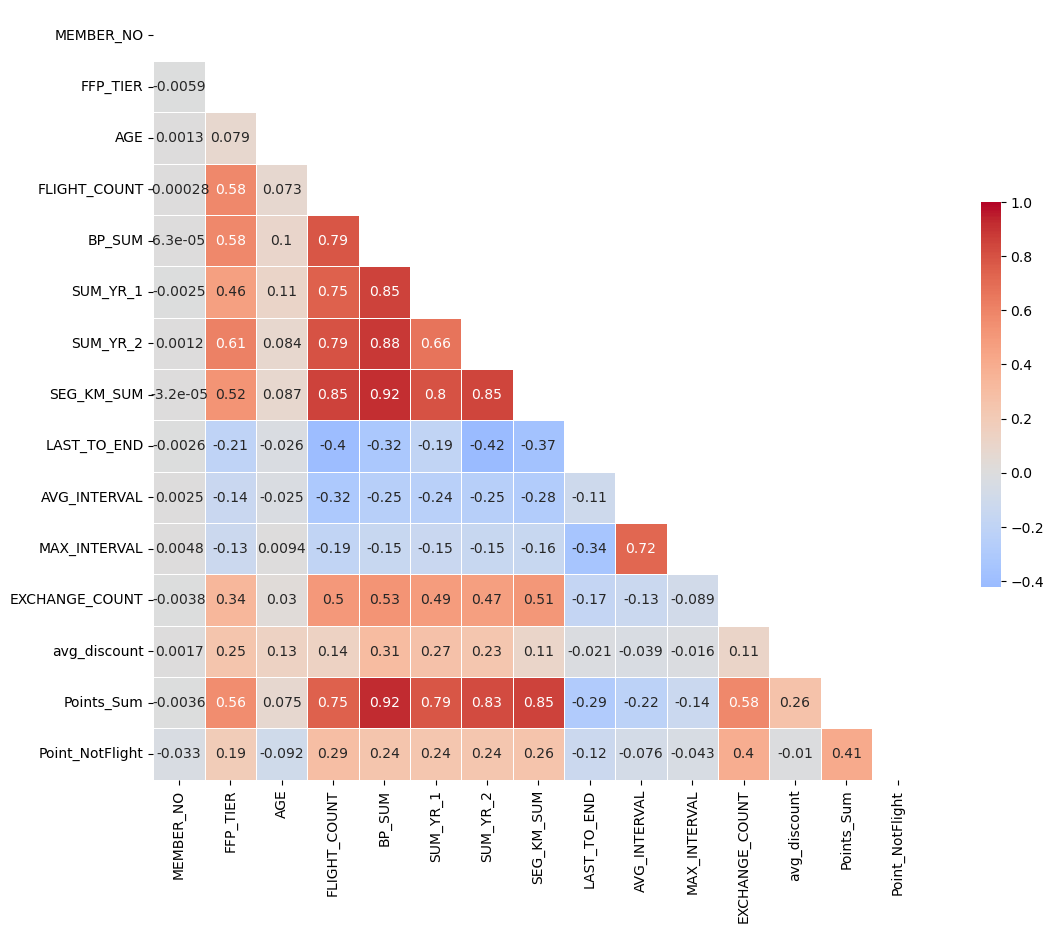

In [13]:
# Compute the correlation matrix
corr = df[nums].corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

Untuk mengidentifikasi korelasi yang kuat antara kolom-kolom dalam dataset, kita dapat mencari pasangan variabel dengan koefisien korelasi absolut tinggi. Berikut beberapa pasangan kolom dengan korelasi kuat (nilai absolut lebih besar dari 0.7):

Korelasi Kuat:
- 1. FLIGHT_COUNT dan BP_SUM (0.788379)
- 2. FLIGHT_COUNT dan SUM_YR_2 (0.794838)
- 3. FLIGHT_COUNT dan SEG_KM_SUM (0.850411)
- 4. BP_SUM dan SUM_YR_1 (0.850624)
- 5. BP_SUM dan SUM_YR_2 (0.884632)
- 6. BP_SUM dan SEG_KM_SUM (0.921724)
- 7. SUM_YR_1 dan SUM_YR_2 (0.663009)
- 8. SUM_YR_1 dan SEG_KM_SUM (0.804125)
- 9. SUM_YR_2 dan SEG_KM_SUM (0.849195)

Ini adalah beberapa pasangan kolom dengan korelasi positif yang kuat (nilai absolut lebih besar dari 0.7).

### 2 Pilih fitur-fitur yang menurut teman-teman masuk akal secara bisnis untuk digunakan sebagai fitur clustering. Lakukan feature engineering!

<b> a. Dari sekian banyak kolom yang ada, tentukan 3-6 fitur untuk digunakan sebagai fitur clustering. Tulis alasan teman-teman memilih fitur tersebut.

1. AGE (Usia)
Alasan: Umur pelanggan dapat memengaruhi preferensi perjalanan dan kebiasaan penerbangan. Kelompok usia yang berbeda mungkin memiliki preferensi yang berbeda terkait tujuan, waktu perjalanan, dan tingkat kenyamanan.

2. SUM_YR_1 (Fare Revenue Tahun Pertama)
Alasan: Ini mencerminkan pendapatan yang diperoleh oleh pelanggan dari tiket pesawat dalam tahun pertama keanggotaan mereka dalam program Frequent Flyer. Data ini dapat membantu mengidentifikasi perilaku pelanggan pada awal keanggotaan mereka dalam program, yang mungkin berbeda dari perilaku pelanggan yang sudah lama bergabung.

3. SUM_YR_2 (Fare Revenue Tahun Kedua)
Alasan: Ini mencerminkan pendapatan yang diperoleh oleh pelanggan dari tiket pesawat dalam tahun kedua keanggotaan mereka dalam program Frequent Flyer. Dapat membantu dalam melihat bagaimana perilaku pelanggan telah berubah seiring berjalannya waktu dalam program Frequent Flyer. Jika ada peningkatan atau penurunan pendapatan, itu dapat mengindikasikan perubahan preferensi atau aktivitas pelanggan.

4. SEG_KM_SUM (Total Jarak Penerbangan)
Alasan: Total jarak penerbangan yang telah dilakukan oleh pelanggan dapat menjadi indikator aktivitas penerbangan. Pelanggan yang sering terbang jarak jauh mungkin memiliki profil yang berbeda dari pelanggan yang terbang jarak pendek.

Jadi kami hanya akan menggunakan 4 features di atas

In [14]:
features = ['AGE', 'SUM_YR_1', 'SUM_YR_2','SEG_KM_SUM']
data = df[features].copy()

<b> b. Lakukan preprocessing

1. Menghapus data null

In [15]:
for i in data.columns:
    if data[i].isnull().sum() > 0:
        print(i)
        print('presentase data yang null:', data[i].isnull().sum()/len(data)*100)
        print('Jumlah data yang null:', data[i].isnull().sum())
        print('Tipe Data yaitu', data[i].dtypes)
        print()

AGE
presentase data yang null: 0.6667936749857116
Jumlah data yang null: 420
Tipe Data yaitu float64

SUM_YR_1
presentase data yang null: 0.8747697974217311
Jumlah data yang null: 551
Tipe Data yaitu float64

SUM_YR_2
presentase data yang null: 0.2190893503524481
Jumlah data yang null: 138
Tipe Data yaitu float64



karena data yang null tidak banyak yaitu di bawah 10%, maka cukup dihapus saja baris data yang hilang.

In [16]:
data.dropna(inplace=True)

data yang null sudah dihapus

2. Menghapus data duplicate

In [17]:
data.duplicated().sum()

145

In [18]:
data.drop_duplicates(inplace=True)

In [19]:
data.duplicated().sum()

0

data yang duplikat sudah dihapus

3. Menghapus Outlier

In [20]:
from scipy import stats

print(f'Jumlah baris sebelum memfilter outlier: {len(data)}')

filtered_entries = np.array([True] * len(data))
columns_exclude = nums[:-1]

for col in columns_exclude:
    zscore = abs(stats.zscore(data[i])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
data = data[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(data)}')

Jumlah baris sebelum memfilter outlier: 61739
Jumlah baris setelah memfilter outlier: 60490


4. Standardization

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
data.sample(5)

,AGE,SUM_YR_1,SUM_YR_2,SEG_KM_SUM
25458,40.0,3310.0,6573.0,13254
56632,37.0,1100.0,653.0,2555
16706,40.0,6800.0,6538.0,21277
12965,44.0,15885.0,0.0,21576
50170,33.0,1700.0,730.0,5487


In [23]:
X = data

scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

df_std = pd.DataFrame(X_std, columns=['AGE', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM'])

In [24]:
df_std.describe()

,AGE,SUM_YR_1,SUM_YR_2,SEG_KM_SUM
count,6.049000e+04,6.049000e+04,6.049000e+04,6.049000e+04
mean,3.552126e-16,-7.517728e-18,7.517728e-18,1.503546e-17
std,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00
min,-3.681505e+00,-7.873707e-01,-7.689816e-01,-9.997100e-01
25%,-7.525256e-01,-6.247842e-01,-6.438450e-01,-7.032697e-01
50%,-1.465299e-01,-3.345696e-01,-3.445109e-01,-3.624068e-01
75%,5.604650e-01,2.524194e-01,2.481024e-01,3.422145e-01
max,6.822420e+00,2.000312e+01,1.108468e+01,4.347496e+00


### 3. Lakukan clustering K-means! Temukan jumlah cluster yang menurut teman-teman optimal dan evaluasi cluster yang dihasilkan dengan visualisasi dan silhouette score

<b> a. Temukan jumlah cluster yang optimal dengan menggunakan elbow method

In [25]:
from sklearn.cluster import KMeans

In [26]:
inertia = []

for i in range (1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_std)
    inertia.append(kmeans.inertia_)

<Axes: >

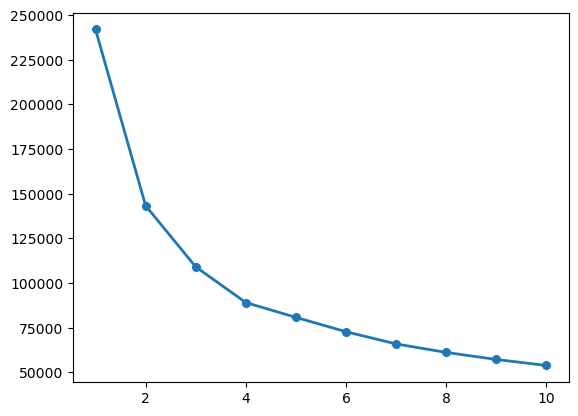

In [27]:
sns.lineplot(x=range(1, 11), y=inertia, linewidth=2)
sns.scatterplot(x=range(1, 11), y=inertia, s=50)

In [28]:
(pd.Series(inertia) - pd.Series(inertia).shift(-1))/pd.Series(inertia)*100

0    40.760768
1    23.873487
2    18.321831
3     9.307027
4     9.918715
5     9.406072
6     7.194813
7     6.458667
8     5.855137
9          NaN
dtype: float64

dari persentase di atas, Penurunan persentase inersia terbesar terjadi antara 1 cluster dan 2 cluster (40.76% - 23.87% = 16.89%). Jadi cluster yang optimal yaitu 2

<b> b. Lakukan clustering menggunakan K-means

In [29]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X_std)
data['km_labels'] = kmeans.labels_

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: xlabel='AGE', ylabel='SUM_YR_1'>

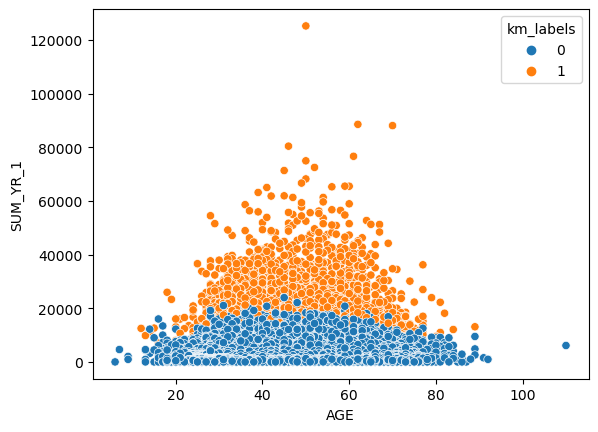

In [30]:
sns.scatterplot(data=data, x='AGE', y='SUM_YR_1', hue='km_labels')

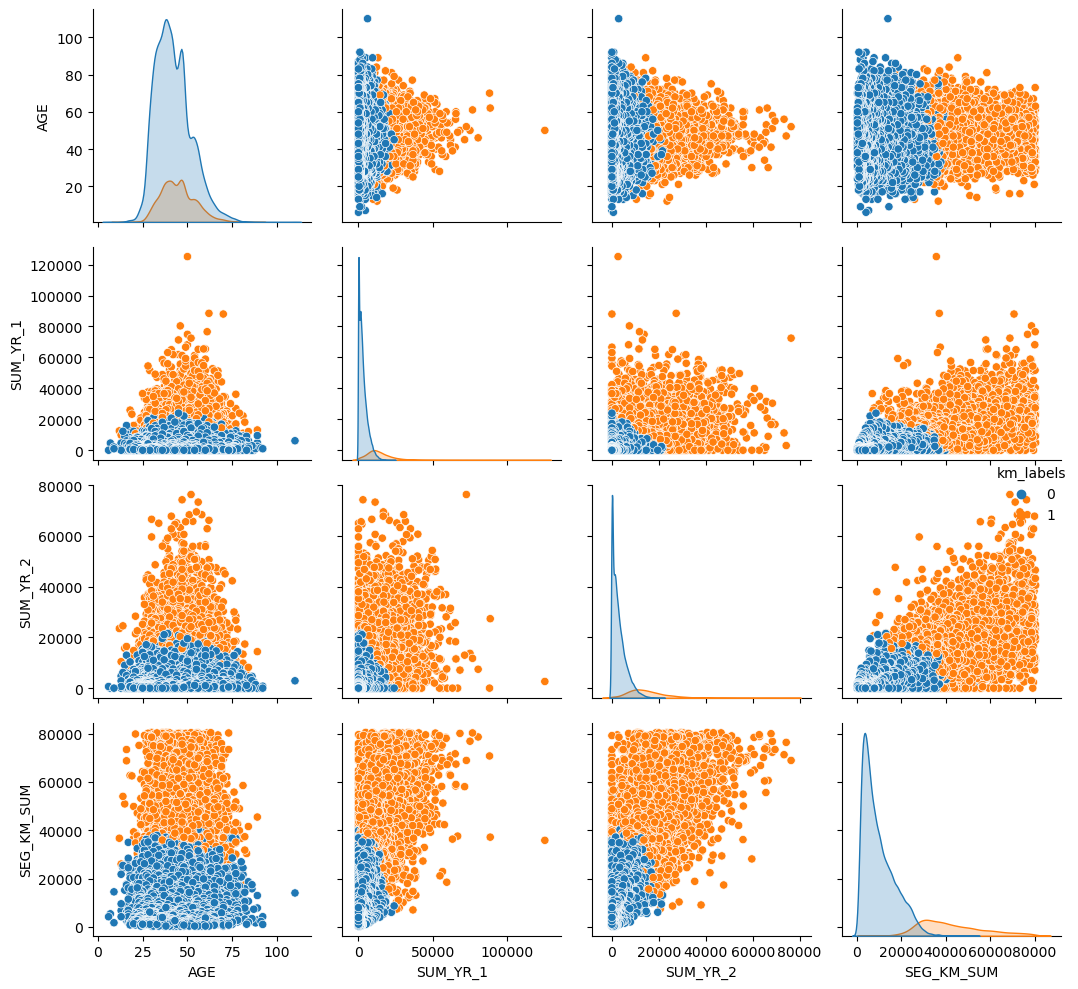

In [31]:
sb.pairplot(data=data, hue='km_labels', diag_kind='kde')
plt.tight_layout()

<b> C. Evaluasi cluster yang dihasilkan dengan menggunakan visualisasi, gunakan PCA 
apabila diperlukan


For n_clusters = 2 The average silhouette_score is : 0.518818905286916
For n_clusters = 3 The average silhouette_score is : 0.3282344621296923
For n_clusters = 4 The average silhouette_score is : 0.33926356322516765
For n_clusters = 5 The average silhouette_score is : 0.33590030295747186
For n_clusters = 6 The average silhouette_score is : 0.26816862989489254


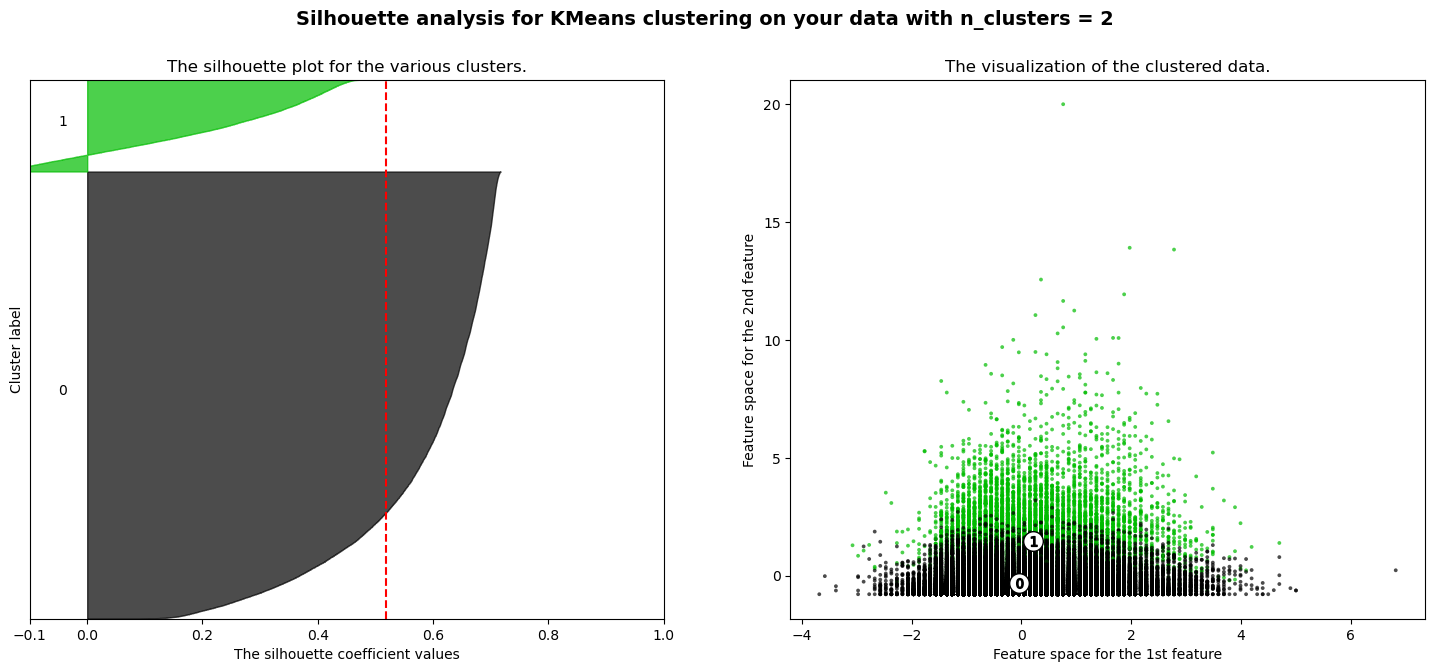

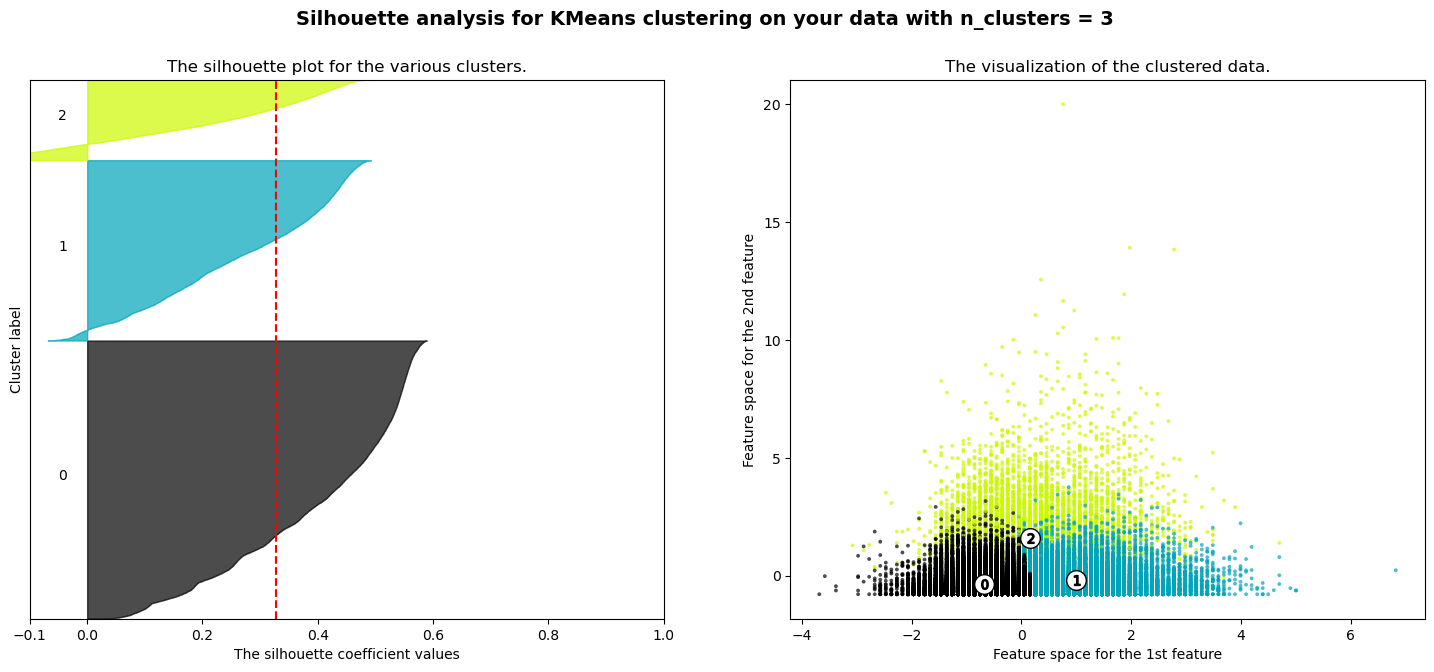

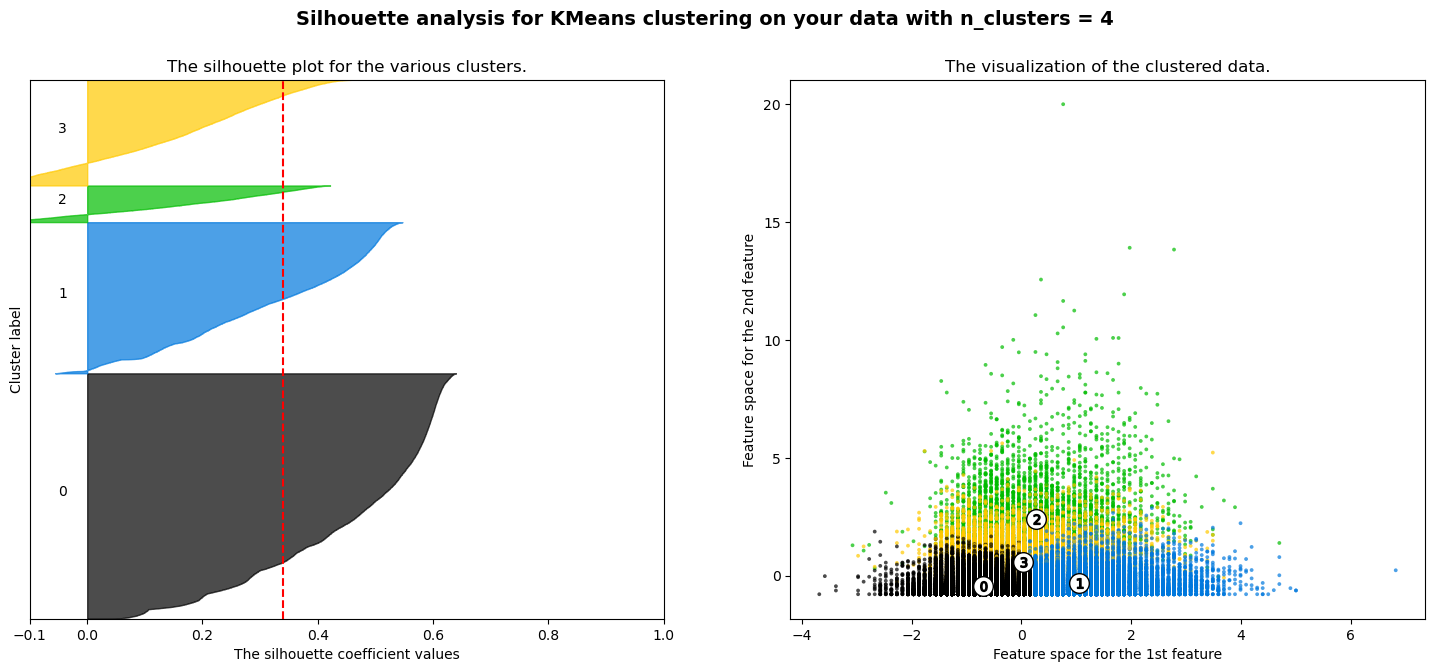

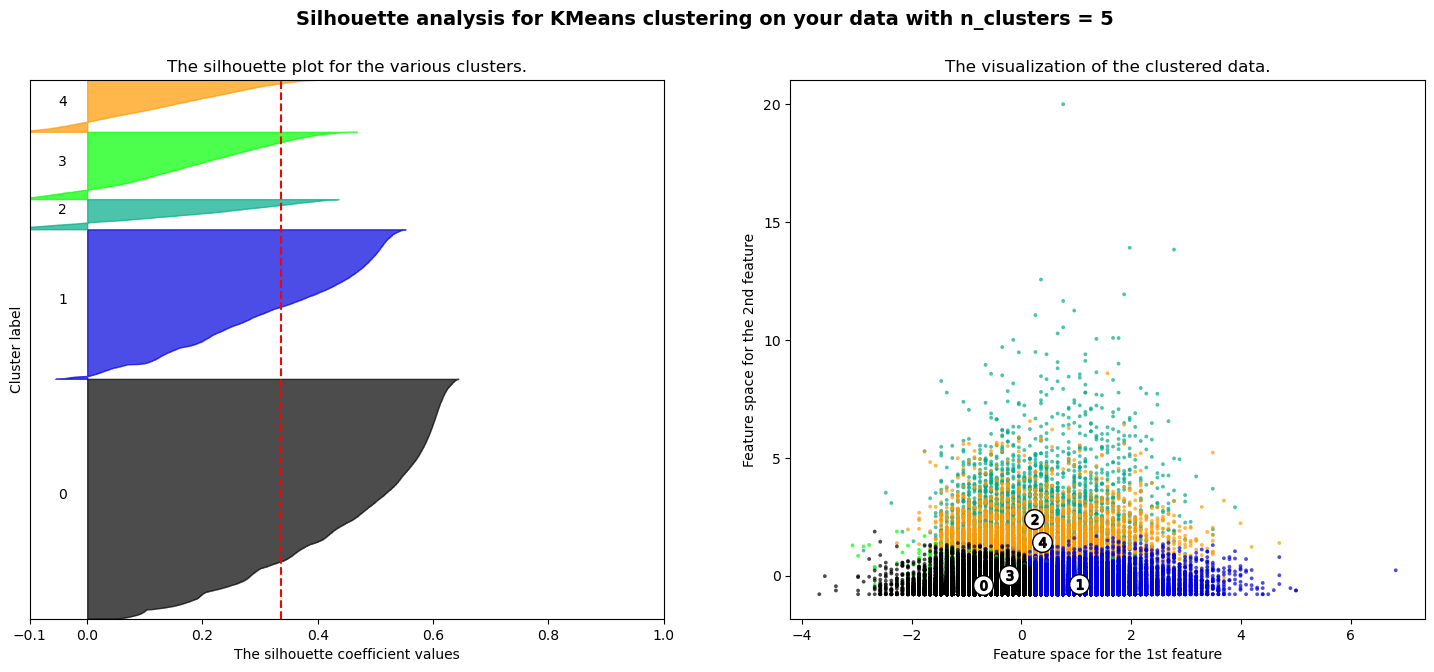

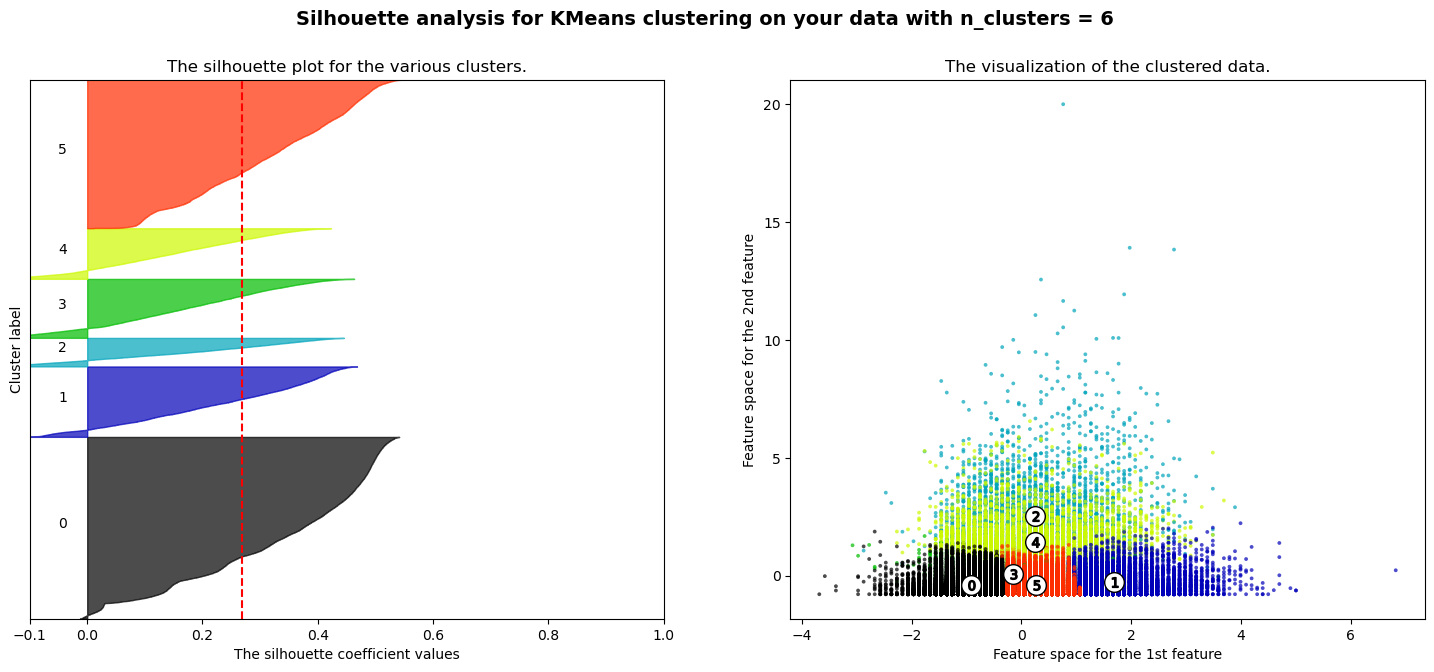

In [32]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Load your data
# Replace "your_data.csv" with the path to your CSV file
your_data = df_std

# Extract features from your data
# Extract features from your data
X = your_data.loc[:, ['AGE', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM']].values


# Set the range of clusters
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    centers = clusterer.cluster_centers_
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on your data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

n_clusters dengan nilai silhouette_score tertinggi adalah 2 dengan nilai 0.518818905286916. Oleh karena itu, jumlah optimal cluster untuk data ini adalah 2. Alasannya adalah karena nilai silhouette_score tertinggi menunjukkan bahwa objek-objek dalam kluster tersebut lebih baik cocok satu sama lain dibandingkan dengan kluster lainnya.

In [33]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_std)for k in range (1, 10)]

silhouette_scores = [silhouette_score(X_std, model.labels_)
                     for model in kmeans_per_k[1:]]

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the valu

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23428\3686827914.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  _ = plt.plot(range(2, 10), silhouette_scores, "bo-", color="blue",


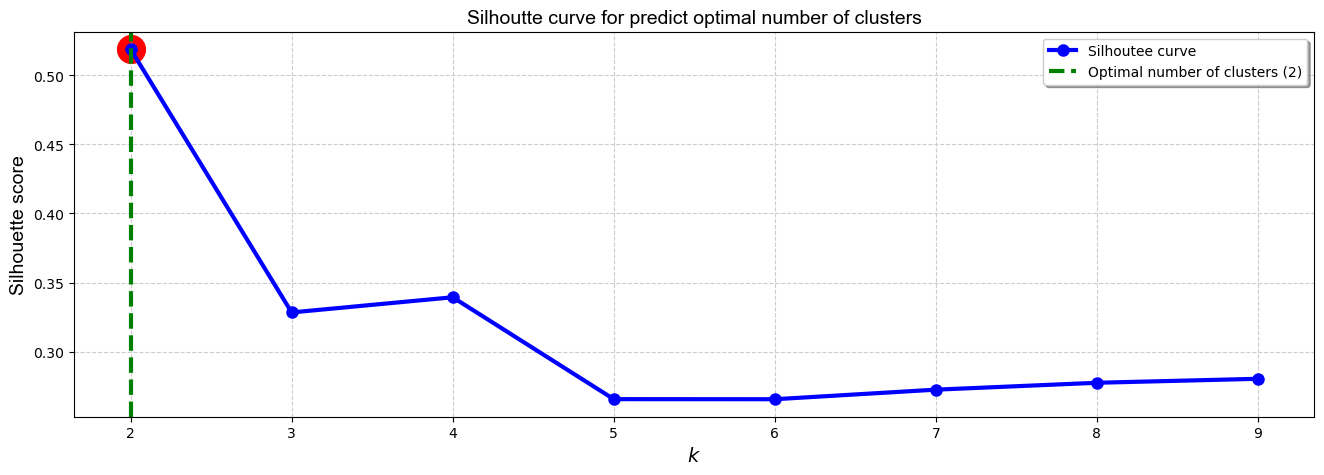

In [34]:
plt.rcParams['figure.figsize'] = 16, 5
_ = plt.plot(range(2, 10), silhouette_scores, "bo-", color="blue",
            linewidth=3, markersize=8, label='Silhoutee curve')

_ = plt.xlabel("$k$", fontsize=14, family='Arial')

_ = plt.ylabel("Silhouette score", fontsize=14, family='Arial')

_ = plt.grid(which='major', color='#cccccc', linestyle='--')

_ = plt.title('Silhoutte curve for predict optimal number of clusters', family='Arial', fontsize=14)

#Calculate the optimal number of cluster
k = np.argmax(silhouette_scores) + 2

#Draw a vertical Line to mark optimat number of clusters

_ = plt.axvline(x=k, linestyle='--', c='green', linewidth=3,
                label = 'Optimal number of clusters ({})'.format(k))

_ = plt.scatter(k, silhouette_scores[k-2], c="red", s=400)

_ = plt.legend (shadow=True)

_ = plt.show()

Dari Grafik diatas juga terbukti bahwa jumlah cluster yang paling optimal adalah 2

### 4. Interpretasi cluster yang dihasilkan secara bisnis dan berikan rekomendasi yang sesuai dengan cluster yang dihasilkan

a. Tempelkan kembali label yang dihasilkan ke dataframe asal, dan keluarkan statistik fitur dari setiap cluster

In [35]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

data['km_labels'] = kmeans.labels_
data.groupby('km_labels').describe()

AGE                                                      \
             count       mean       std   min   25%   50%   75%    max   
km_labels                                                                
0          50220.0  42.004042  9.921944   6.0  35.0  41.0  48.0  110.0   
1          10270.0  44.635443  9.501393  12.0  38.0  44.0  50.0   89.0   

          SUM_YR_1                                                             \
             count          mean          std  min     25%      50%       75%   
km_labels                                                                       
0          50220.0   2909.057274  2900.169253  0.0   710.0   2104.0   4288.00   
1          10270.0  13699.616456  8704.356108  0.0  8088.5  12194.0  17621.75   

                    SUM_YR_2                                                   \
                max    count          mean          std  min     25%      50%   
km_labels                                                                       
0           23962.0  50220.0   2882.685245  2999.093490  0.0   562.0   2021.0   
1          125188.0  10270.0  15076.671762  8770.884945  0.0  9200.0  13530.0   

                             SEG_KM_SUM                                      \
                75%      max      count          mean           std     min   
km_labels                                                                     
0           4311.00  21559.0    50220.0   9830.089387   7049.686790   368.0   
1          19229.75  76349.0    10270.0  42311.288900  14247.883338  7036.0   

                                                
                25%      50%      75%      max  
km_labels                                       
0           4166.00   7818.5  14021.0  52845.0  
1          31264.75  39311.0  51288.0  80475.0

<b> b. Deskripsikan secara kontekstual customer seperti apa yang ada di masing-masing 
cluster.

* Kluster 0:

- Usia: Pelanggan dalam kluster ini memiliki usia rata-rata sekitar 42 tahun, dengan standar deviasi sekitar 9,92 tahun.
- Pendapatan Tiket Tahun Pertama (SUM_YR_1): Pendapatan tiket tahun pertama memiliki rata-rata sekitar 2909, dengan standar deviasi 2900. Rentang pendapatan bervariasi dari 0 hingga 23962.
- Pendapatan Tiket Tahun Kedua (SUM_YR_2): Pendapatan tiket tahun kedua memiliki rata-rata sekitar 2883, dengan deviasi standar 2999. Rentang pendapatan bervariasi dari 0 hingga 21559.
- Jarak Terbang Total (SEG_KM_SUM): Jarak terbang total memiliki rata-rata sekitar 9830 km, dengan standar deviasi 7049. Rentang jarak terbang bervariasi dari 368 hingga 52845.

* Kluster 1:

- Usia: Pelanggan dalam kluster ini memiliki usia rata-rata sekitar 44,64 tahun, dengan standar deviasi sekitar 9,50 tahun.
- Pendapatan Tiket Tahun Pertama (SUM_YR_1): Pendapatan tiket tahun pertama memiliki rata-rata sekitar 13700, dengan standar deviasi 8704. Rentang pendapatan bervariasi dari 0 hingga 125188.
- Pendapatan Tiket Tahun Kedua (SUM_YR_2): Pendapatan tiket tahun kedua memiliki rata-rata sekitar 15077, dengan standar deviasi 8771. Rentang pendapatan bervariasi dari 0 hingga 76349.
- Jarak Terbang Total (SEG_KM_SUM): Jarak terbang total memiliki rata-rata sekitar 42311 km, dengan standar deviasi 14248. Rentang jarak terbang bervariasi dari 7036 hingga 80475.

* Interpretasi:

- Kluster 0: Pelanggan dalam kluster ini, secara rata-rata, sedikit lebih muda dengan pendapatan rata-rata lebih rendah dan jarak terbang total lebih pendek dibandingkan dengan Kluster 1. Mereka tidak terlalu sering bepergian dan mungkin lebih memperhatikan harga tiket pesawat.

- Kluster 1: Pelanggan dalam kluster ini, secara rata-rata, sedikit lebih tua dengan pendapatan rata-rata lebih tinggi dan jarak terbang total lebih panjang dibandingkan dengan Kluster 0. Mereka sering bepergian dan mungkin lebih siap mengeluarkan uang lebih banyak untuk tiket pesawat.

<b> C. Berdasarkan cluster tersebut, berikan 1-2 rekomendasi

- Rekomendasi untuk Kluster 0:

1. Penawaran Spesial: Karena pelanggan di kluster ini cenderung memiliki pendapatan tiket tahun pertama dan kedua yang lebih rendah, pertimbangkan untuk memberikan penawaran spesial atau promo yang dapat mendorong mereka untuk berbelanja lebih banyak. Ini bisa berupa diskon khusus, insentif dari program loyalitas, atau paket perjalanan yang disesuaikan.

2. Layanan untuk Pemuda: Karena pelanggan di kluster ini cenderung lebih muda, mungkin baiknya menyesuaikan layanan agar lebih cocok dengan selera pelancong muda. Bisa mencakup penawaran dengan harga yang lebih terjangkau, fleksibilitas dalam pengaturan perjalanan, atau interaksi melalui media sosial.

- Rekomendasi untuk Kluster 1:

1. Layanan Premium: Pelanggan di kluster ini cenderung menghabiskan lebih banyak dan melakukan perjalanan jarak jauh. Pertimbangkan untuk menyajikan layanan premium, seperti ruang tunggu eksklusif, prioritas saat naik pesawat, atau fasilitas khusus untuk memenuhi keinginan mereka dan mendorong loyalitas.

2. Hadiah untuk Pelanggan ynag sering melakukan perjalanan: Mengingat pelanggan di kluster ini sering melakukan perjalanan jarak jauh, mereka mungkin akan senang dengan program frequent flyer. Tingkatkan dan promosikan program loyalitas Anda, termasuk hadiah seperti penerbangan gratis, peningkatan kelas, atau pengalaman eksklusif bagi mereka yang sering melakukan perjalanan.